In [29]:
from gurobipy import *
from math import * 

In [30]:
"""

Poikonen, S., & Golden, B. (2020). 
The mothership and drone routing problem. 
INFORMS Journal on Computing, 32(2), 249-262.

https://drive.google.com/file/d/1C_4_F6HzwCA3upkeWnZ0CWkMoHHefzy5/view

"""


n=2

In [31]:
#s=((10,10),(10,90),(90,15),(90,10),(50,0),(10,10));
s=((0,0),(0,40),(0,50),(1,49),(46,50),(48,48),(46,46),(50,48),(50,35),(30,5),(30,0));

orig=(0,0)
dest=(50,0)
R=0.35
alpha=5
Vv=90
Vc=18

In [32]:
# Create a new model
m = Model("Poikonen_2019")

In [33]:
# Create variables

cTime = {};
sTime = {};

lPoint_x= {};
lPoint_y= {};

rPoint_x= {};
rPoint_y= {};


outFlightDist = {};
inFlightDist = {};

#for SOCP
Cx= {};
Cy= {};
C= {};


In [34]:
for i in range(0, n+1):
    
    
    outFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='outFlightDist[%s]'%i);
    inFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='inFlightDist[%s]'%i);
    

    

for i in range(0, n+2):
    lPoint_x[i] = m.addVar(vtype = 'C',name='lPoint_x[%s]'%i);
    lPoint_y[i] = m.addVar(vtype = 'C',name='lPoint_y[%s]'%i);
    
    rPoint_x[i] = m.addVar(vtype = 'C',name='rPoint_x[%s]'%i);
    rPoint_y[i] = m.addVar(vtype = 'C',name='rPoint_y[%s]'%i);
    
    cTime[i] = m.addVar(lb=0.0,vtype = 'C',name='cTime[%s]'%i);
    
    sTime[i] = m.addVar(lb=0.0,vtype = 'C',name='sTime[%s]'%i);
    

m.update()

In [35]:

# Add constraint: 
ctr=0;


#A8
m.addConstr( lPoint_x[0]==orig[0]);
m.addConstr( lPoint_y[0]==orig[1] ); 
#A9
m.addConstr( rPoint_x[0]==orig[0] ); 
m.addConstr( rPoint_y[0]==orig[1]); 
#A10
m.addConstr( lPoint_x[n+1]==dest[0]); 
m.addConstr( lPoint_y[n+1]==dest[1] ); 
#A11
m.addConstr( rPoint_x[n+1]==dest[0]); 
m.addConstr( rPoint_y[n+1]==dest[1]); 

for k in range(0, n+1):
    #A2
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A2');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A2');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A2');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k+1] - rPoint_x[k], 'A2x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k+1] - rPoint_y[k], 'A2y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A2.2');
    m.addConstr( C[ctr]-Vc*cTime[k]   == 0, 'A2.3');
    
    #A3
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k] - rPoint_x[k], 'A3x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k] - rPoint_y[k], 'A3y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2');
    m.addConstr( C[ctr]-Vc*sTime[k]   == 0, 'A3.3');
    
    
    #A4
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A4');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A4');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A4');
    
    
    m.addConstr( Cx[ctr]  == s[k][0] - lPoint_x[k], 'A4x.1'); 
    m.addConstr( Cy[ctr]  == s[k][1] - lPoint_y[k], 'A4y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A4.2');
    m.addConstr( C[ctr]-Vv*outFlightDist[k]   == 0, 'A4.3'); 
    
    #A5
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A5');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A5');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A5');
    
    
    m.addConstr( Cx[ctr]  == s[k][0] - rPoint_x[k], 'A5x.1'); 
    m.addConstr( Cy[ctr]  == s[k][1] - rPoint_y[k], 'A5y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A5.2');
    m.addConstr( C[ctr]-Vv*inFlightDist[k]   == 0, 'A5.3'); 
    
    
    #A6
    #m.addConstr( (outFlightDist[k] + inFlightDist[k])/alpha   <= sTime[k], 'A6'); 
    m.addConstr( (outFlightDist[k] + inFlightDist[k])  <= sTime[k], 'A6'); 
    
    #A7
    m.addConstr( sTime[k]   <= R, 'A7'); 
    
    
    
    
    
    

In [36]:
# Set objective:


obj = quicksum((cTime[k]+sTime[k]) for k in range(0,n+2))

m.setObjective(obj,GRB.MINIMIZE)

In [37]:
m.optimize()

Optimize a model with 50 rows, 66 columns and 104 nonzeros
Optimize a model with 50 rows, 66 columns and 104 nonzeros
Model has 12 quadratic constraints
Model has 12 quadratic constraints
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Matrix range     [1e+00, 9e+01]
  QMatrix range    [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 5e+01]
  RHS range        [3e-01, 5e+01]
Presolve removed 37 rows and 36 columns
Presolve removed 37 rows and 36 columns
Presolve time: 0.02s
Presolve time: 0.02s
Presolved: 23 rows, 30 columns, 45 nonzeros
Presolved: 23 rows, 30 columns, 45 nonzeros
Presolved model has 9 second-order cone constraints
Presolved model has 9 second-order cone constraints
Ordering time: 0.00s
Ordering time: 0.00s


Barrier statistics:
Barrier statistics:
 AA' NZ     : 7.900e+01
 A

t_m: 5.349632896880541 hours

t_m: 5.349632896880541 hours



<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

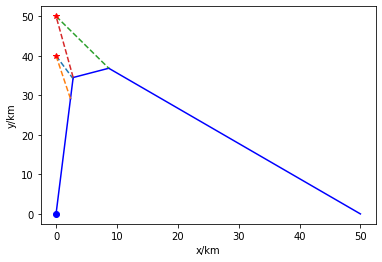

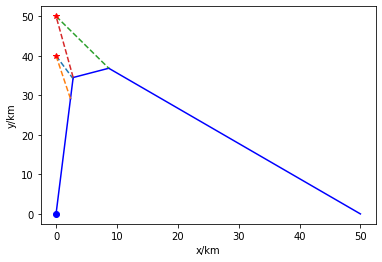

In [38]:
obj = m.getObjective()
print("t_m:",obj.getValue(),"hours\n")
import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([lPoint_x[1].X, orig[0]],[lPoint_y[1].X,  orig[1]], color= 'b')
plt.plot([rPoint_x[n].X, dest[0]],[rPoint_y[n].X,  dest[1]], color= 'b')

for i in range(1,n+1):
    plt.plot([lPoint_x[i].X, rPoint_x[i].X],[lPoint_y[i].X,  rPoint_y[i].X], color= 'b')
    if i<n:
        plt.plot([lPoint_x[i+1].X, rPoint_x[i].X],[lPoint_y[i+1].X,  rPoint_y[i].X], color= 'b')


for i in range(1,n+1):
    plt.plot([s[i][0] ,  rPoint_x[i].X] ,[s[i][1],  rPoint_y[i].X],linestyle= '--')
    plt.plot([lPoint_x[i].X, s[i][0]],[lPoint_y[i].X,  s[i][1]],linestyle= '--')
    plt.plot(s[i][0], s[i][1], marker='*',color='r')

plt.plot(s[0][0], s[0][1], marker='o',color='b')
plt.show

In [39]:
lPoint_x

{0: <gurobi.Var lPoint_x[0] (value 0.0)>,
 1: <gurobi.Var lPoint_x[1] (value 2.3738618202967254)>,
 2: <gurobi.Var lPoint_x[2] (value 2.8116398086532923)>,
 3: <gurobi.Var lPoint_x[3] (value 50.0)>}

{0: <gurobi.Var lPoint_x[0] (value 0.0)>,
 1: <gurobi.Var lPoint_x[1] (value 2.3738618202967254)>,
 2: <gurobi.Var lPoint_x[2] (value 2.8116398086532923)>,
 3: <gurobi.Var lPoint_x[3] (value 50.0)>}

In [40]:
lPoint_y

{0: <gurobi.Var lPoint_y[0] (value 0.0)>,
 1: <gurobi.Var lPoint_y[1] (value 29.13001468075684)>,
 2: <gurobi.Var lPoint_y[2] (value 34.50353681387974)>,
 3: <gurobi.Var lPoint_y[3] (value 0.0)>}

{0: <gurobi.Var lPoint_y[0] (value 0.0)>,
 1: <gurobi.Var lPoint_y[1] (value 29.13001468075684)>,
 2: <gurobi.Var lPoint_y[2] (value 34.50353681387974)>,
 3: <gurobi.Var lPoint_y[3] (value 0.0)>}

In [41]:
rPoint_x

{0: <gurobi.Var rPoint_x[0] (value 0.0)>,
 1: <gurobi.Var rPoint_x[1] (value 2.788430912786014)>,
 2: <gurobi.Var rPoint_x[2] (value 8.660643556077801)>,
 3: <gurobi.Var rPoint_x[3] (value 50.0)>}

{0: <gurobi.Var rPoint_x[0] (value 0.0)>,
 1: <gurobi.Var rPoint_x[1] (value 2.788430912786014)>,
 2: <gurobi.Var rPoint_x[2] (value 8.660643556077801)>,
 3: <gurobi.Var rPoint_x[3] (value 50.0)>}

In [42]:
rPoint_y

{0: <gurobi.Var rPoint_y[0] (value 0.0)>,
 1: <gurobi.Var rPoint_y[1] (value 34.218697676845935)>,
 2: <gurobi.Var rPoint_y[2] (value 36.844295599801804)>,
 3: <gurobi.Var rPoint_y[3] (value 0.0)>}

{0: <gurobi.Var rPoint_y[0] (value 0.0)>,
 1: <gurobi.Var rPoint_y[1] (value 34.218697676845935)>,
 2: <gurobi.Var rPoint_y[2] (value 36.844295599801804)>,
 3: <gurobi.Var rPoint_y[3] (value 0.0)>}